**Сборный проект**

**Описание проекта:**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**

    'Name' — название игры
    'Platform' — платформа
    'Year_of_Release' — год выпуска
    'Genre' — жанр игры
    'NA_sales' — продажи в Северной Америке (миллионы проданных копий)
    'EU_sales' — продажи в Европе (миллионы проданных копий)
    'JP_sales' — продажи в Японии (миллионы проданных копий)
    'Other_sales' — продажи в других странах (миллионы проданных копий)
    'Critic_Score' — оценка критиков (максимум 100)
    'User_Score' — оценка пользователей (максимум 10)
    'Rating' — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы:**

    Шаг 1. Откройте файл с данными и изучите общую информацию
        Путь к файлу: /datasets/games.csv. Скачать датасет
    Шаг 2. Подготовьте данные
        Замените названия столбцов (приведите к нижнему регистру);
        Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
        Обработайте пропуски при необходимости:
        Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
        Опишите причины, которые могли привести к пропускам;
        Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
        Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
    Шаг 3. Проведите исследовательский анализ данных
        Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
        Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
        Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
        Не учитывайте в работе данные за предыдущие годы.
        Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
        Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
        Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
        Соотнесите выводы с продажами игр на других платформах.
        Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    Шаг 4. Составьте портрет пользователя каждого региона
        Определите для пользователя каждого региона (NA, EU, JP):
        Самые популярные платформы (топ-5). Опишите различия в долях продаж.
        Самые популярные жанры (топ-5). Поясните разницу.
        Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    Шаг 5. Проверьте гипотезы
        Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
        Задайте самостоятельно пороговое значение alpha.
        Поясните:
        Как вы сформулировали нулевую и альтернативную гипотезы;
        Какой критерий применили для проверки гипотез и почему.
    Шаг 6. Напишите общий вывод

**1 Шаг 1. Откроем файл с данными и изучим общую информацию**

**Импортируем нужные библиотеки**

In [1]:
#Импортируем библиотеку pandas
import pandas as pd
#Импортируем библиотеку matplotlib
import matplotlib.pyplot as plt
#Импортируем метод stats из библиотеки scipy
from scipy import stats as st

**Считаем данные из csv-файла в датафрейм и сохраним в переменную.**

In [2]:
data = pd.read_csv('/datasets/games.csv')

**Выведем первые 20 строк датасета data и информацию о нём.**

In [3]:
#Сделаем обзор датасета data
display(data.shape)
display(data.info())
data.head(20)

(16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Сделаем выводы по обзору данных:**
 - В датасете 16715 строк и 11 столбцов.
 - В датасете обнаружены пропуски (значения NaN).
 - В датасете обнаружены неправильные типы данных (например год выпуска представлен типом float).

**2 Шаг 2. Предобработка данных.**

**Приведем названия столбцов к нижнему регистру.**

In [4]:
#Приводим все столбцы к нижнему регистру
data.columns = map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Найдем дубликаты в датасете.**

In [5]:
data.duplicated().sum()

0

**Найдем неявные дубликатыю**

In [6]:
#Приведем столбцы к нижнему регистру
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
#Выполним поиск дубликатов по трем столбцам
data.duplicated(['name', 'platform', 'genre']).sum()

5

In [7]:
#Удалим найденные неявные дубликаты
data = data.drop_duplicates(subset=['name', 'platform', 'genre'], keep='first')
data.duplicated(['name', 'platform', 'genre']).sum()

0

**Преобразуем данные в нужные типы.**

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int', errors = 'ignore')
data['year_of_release'].head(20)

0     2006.0
1     1985.0
2     2008.0
3     2009.0
4     1996.0
5     1989.0
6     2006.0
7     2006.0
8     2009.0
9     1984.0
10    2005.0
11    2005.0
12    1999.0
13    2007.0
14    2010.0
15    2009.0
16    2013.0
17    2004.0
18    1990.0
19    2005.0
Name: year_of_release, dtype: float64

Преобразовать данные в нужные типы невозможно из-за значений типа NaN. Повторим операцию после обработки значений NaN.

**Обработаем пропуски.**

In [9]:
#Выведем количество пропусков по столбцам
data.isna().sum().sort_values(ascending=False)

critic_score       8577
rating             6765
user_score         6700
year_of_release     268
name                  1
genre                 1
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Удалим значения NaN в столбцах name и year_of_release. Их немного, и их удаление не повлияет на результаты исследования.


In [10]:
#Удалим значения NaN в столбцах name и year_of_release
data = data.dropna(subset=['name', 'year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Не будем заменять значения в столбцах critic_score, user_score и rating так как в них содержится рейтинг игроков и критиков, а это очень индивидуальный показатель, и он может повлиять на ход исследования (допустим, нам понадобится средний рейтинг серии игр, и замена значений медианой или средним по всему датасету может дать необъективный результат).

**Причины, которые могли привести к пропускам:**

Скорее всего причины пропусков именно в этих столбцах это то, что данные игры не оценивались, или их оценку не смогли найти при составлении таблицы.

Так же потеря данных могла произойти из-за технической ошибки на стадии ввода или сохранения данных в базе данных.

Одной из причин отсутствия данных может быть человеческий фактор во время заполнения данных.

Еще одной причиной может быть техническая ошибка при скачивании файла

**Проверим данные в столбцах с пропусками на наличие аномальных значений.**

In [11]:
#Выведем уникальные значения для столбца critic_score
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [12]:
#Выведем уникальные значения для столбца user_score
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [13]:
#Выведем уникальные значения для столбца rating
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

**Разберемся со значением 'tbd' в столбце user_score.**

In [14]:
data_user_score_tbd = data[data['user_score'] == 'tbd']
data_user_score_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,just dance kids,wii,2010.0,misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Мы не обнаружили каких-либо закономерностей для значения 'tbd' в других столбцах. Заменим это значение на значение NaN.

**Повторно преобразуем данные в нужные типы.**

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int', errors = 'ignore')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
display(data['year_of_release'].head(20))
data['user_score'].sort_values().unique()

0     2006
1     1985
2     2008
3     2009
4     1996
5     1989
6     2006
7     2006
8     2009
9     1984
10    2005
11    2005
12    1999
13    2007
14    2010
15    2009
16    2013
17    2004
18    1990
19    2005
Name: year_of_release, dtype: int64

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [16]:
#Выведем информацию о датасете на экран
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Просуммируем значения в столбцах na_sales, eu_sales, jp_sales и other_sales и добавим в отдельный столбец.**

In [17]:
data['sum_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**3 Шаг 3. Исследовательский анализ данных.**

**Посмотрим, сколько игр выпускалось в разные годы.**

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     938
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     651
2013     544
2014     581
2015     606
2016     502
Name: genre, dtype: int64

Text(0, 0.5, 'Количество игр')

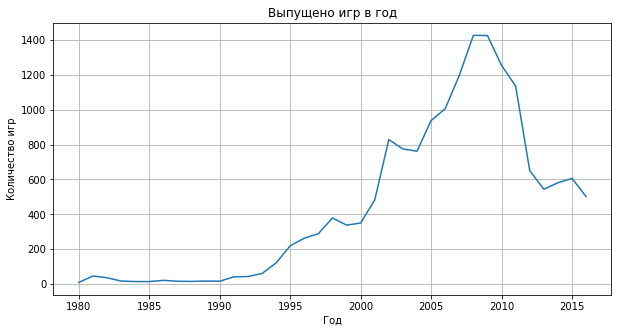

In [18]:
data_year_of_release = data.groupby('year_of_release')['genre'].count()
display(data_year_of_release)
data_year_of_release.plot(grid=True, figsize=(10, 5))
plt.title('Выпущено игр в год')
plt.xlabel('Год')
plt.ylabel('Количество игр')

**Вывод:** Данные с 1980 по 1993 годы можно не учитывать, так как за каждый год выходило немного игр.

**Посмотрим, как менялись продажи по платформам.**

**Выберем платформы с наибольшими суммарными продажами.**

In [19]:
#Построим сводную таблицу для продаж по платформам
data_platform = pd.pivot_table(data, index=['platform'], values='sum_sales', aggfunc='sum').sort_values('sum_sales',ascending=False)
data_platform.columns = ['Продажи']
data_platform.head(30)

,Продажи
platform,
ps2,1233.56
x360,959.99
ps3,931.33
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Text(0, 0.5, 'Количество игр')

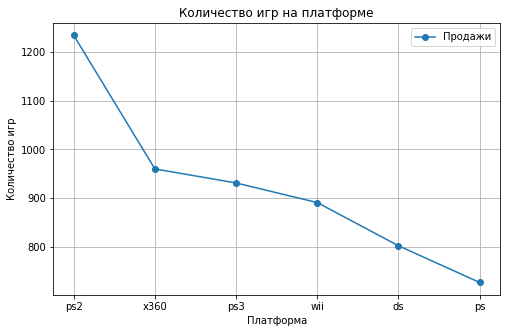

In [20]:
data_top_platform = data_platform.loc['ps2':'ps']
data_top_platform.plot(style='o-', grid=True, figsize=(8,5))
plt.title('Количество игр на платформе')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')

Здесь можно взять первые 6 платформ с наибольшими сумарными продажами, так как сумма их продаж значительно отличается от других платформ.

In [21]:
#Построим сводную таблицу продаж по годам для PS2
platform_sales = pd.pivot_table(data[data['platform'] == 'pc2'], index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
platform_sales

,
platform,year_of_release


In [22]:
#Построим сводную таблицу продаж по годам для X360
platform_sales = pd.pivot_table(data[data['platform'] == 'x360'], index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
platform_sales

sum_sales
platform year_of_release           
x360     2005                  7.00
         2006                 51.62
         2007                 95.41
         2008                135.26
         2009                120.29
         2010                170.03
         2011                143.84
         2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52

In [23]:
#Построим сводную таблицу продаж по годам для PS3
platform_sales = pd.pivot_table(data[data['platform'] == 'ps3'], index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
platform_sales

sum_sales
platform year_of_release           
ps3      2006                 20.96
         2007                 73.19
         2008                118.52
         2009                130.93
         2010                142.17
         2011                156.78
         2012                107.35
         2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60

In [24]:
#Построим сводную таблицу продаж по годам для Wii
platform_sales = pd.pivot_table(data[data['platform'] == 'wii'], index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
platform_sales

sum_sales
platform year_of_release           
wii      2006                137.15
         2007                152.77
         2008                171.32
         2009                206.97
         2010                127.95
         2011                 59.65
         2012                 21.71
         2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18

In [25]:
#Построим сводную таблицу продаж по годам для DS
platform_sales = pd.pivot_table(data[data['platform'] == 'ds'], index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
platform_sales

sum_sales
platform year_of_release           
ds       1985                  0.02
         2004                 17.27
         2005                130.14
         2006                119.81
         2007                146.94
         2008                145.31
         2009                119.54
         2010                 85.02
         2011                 26.18
         2012                 11.01
         2013                  1.54

In [26]:
#Построим сводную таблицу продаж по годам для PS
platform_sales = pd.pivot_table(data[data['platform'] == 'ps'], index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
platform_sales

sum_sales
platform year_of_release           
ps       1994                  6.03
         1995                 35.96
         1996                 94.70
         1997                136.17
         1998                169.49
         1999                144.53
         2000                 96.37
         2001                 35.59
         2002                  6.67
         2003                  2.07

Text(0, 0.5, 'Сумма продаж')

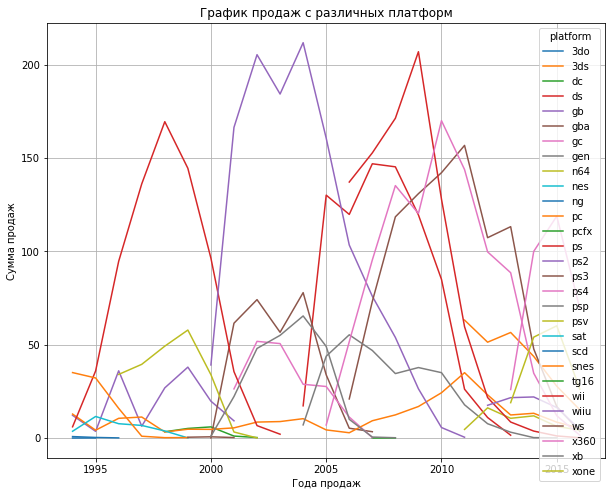

In [27]:
#Проанализируем за какой период появляются и исчезают новые платформы
data_sales_1994_2016 = data.query('1994 <= year_of_release <= 2016')
data_sales_1994_2016.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(10, 8))
plt.title('График продаж с различных платформ')
plt.xlabel('Года продаж')
plt.ylabel('Сумма продаж')

**Вывод:** Новые платформы появляются и исчезают за период примерно в 10 лет.

**Возьмём данные за соответствующий актуальный период.**

Text(0, 0.5, 'Сумма продаж')

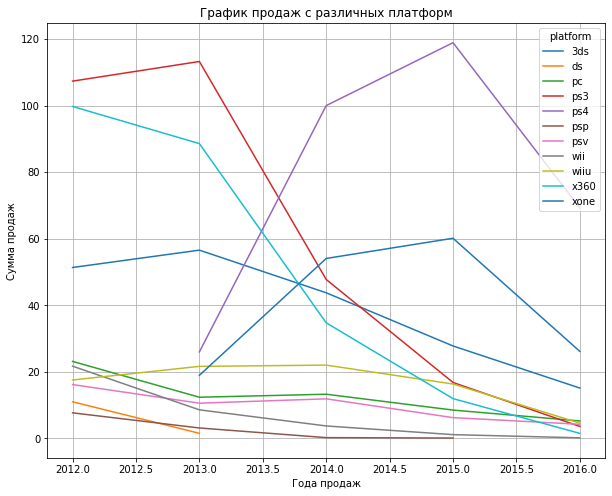

In [28]:
#Возьмем данные для анализа за актуальный период
data_sales_2012_2016 = data[data['year_of_release'] >= 2012]
data_sales_2012_2016.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(10, 8))
plt.title('График продаж с различных платформ')
plt.xlabel('Года продаж')
plt.ylabel('Сумма продаж')

**Вывод:** Судя по данным за актуальный период (2012-2016 года) наблюдается **спад** продаж с разных платформ. Скорее всего в 2017 году продажи будут ниже чем в 2016.

**Какие платформы лидируют по продажам, растут или падают?**

**Вывод:** Судя по графикам лидирующие платформы, это PS4 и XOne. Со старта продаж по 2015 год на этих платформах наблюдался рост продаж игр. Но с 2015 по 2016 уровень продаж игр падает.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

Возьмем данные с 5 топовых платформ на актуальный период времени - PS4, XOne, PS3, 3DS и X360. 

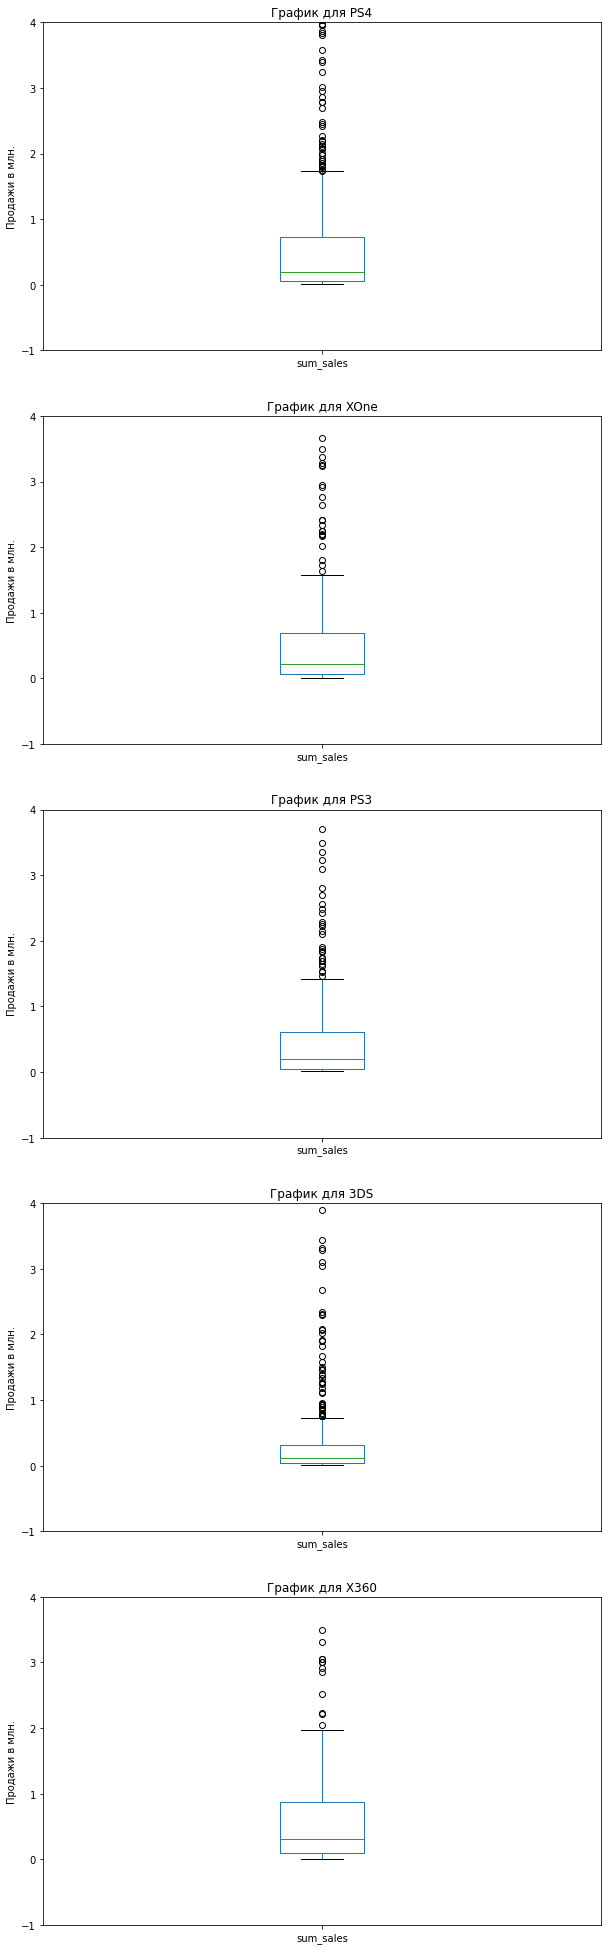

In [29]:
#Построим график boxplot для платформы PS3
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 35))
data_sales_PS4 = data_sales_2012_2016[data_sales_2012_2016['platform']=='ps4']['sum_sales'].plot(ax=axes[0], kind='box', ylim=(-1, 4), title='График для PS4', ylabel='Продажи в млн.')
data_sales_XOne = data_sales_2012_2016[data_sales_2012_2016['platform']=='xone']['sum_sales'].plot(ax=axes[1], kind='box', ylim=(-1, 4), title='График для XOne', ylabel='Продажи в млн.')
data_sales_PS3 = data_sales_2012_2016[data_sales_2012_2016['platform']=='ps3']['sum_sales'].plot(ax=axes[2], kind='box', ylim=(-1, 4), title='График для PS3', ylabel='Продажи в млн.')
data_sales_3DS = data_sales_2012_2016[data_sales_2012_2016['platform']=='3ds']['sum_sales'].plot(ax=axes[3], kind='box', ylim=(-1, 4), title='График для 3DS', ylabel='Продажи в млн.')
data_sales_X360 = data_sales_2012_2016[data_sales_2012_2016['platform']=='x360']['sum_sales'].plot(ax=axes[4], kind='box', ylim=(-1, 4), title='График для X360', ylabel='Продажи в млн.')

In [30]:
#Выведем параметры для всех платформ
data_sales_PS4 = data_sales_2012_2016[data_sales_2012_2016['platform']=='ps4']
data_sales_XOne = data_sales_2012_2016[data_sales_2012_2016['platform']=='xone']
data_sales_PS3 = data_sales_2012_2016[data_sales_2012_2016['platform']=='ps3']
data_sales_3DS = data_sales_2012_2016[data_sales_2012_2016['platform']=='3ds']
data_sales_X360 = data_sales_2012_2016[data_sales_2012_2016['platform']=='x360']
print('Параметры для PS4')
display(data_sales_PS4['sum_sales'].describe())
print('Параметры для XOne')
display(data_sales_XOne['sum_sales'].describe())
print('Параметры для PS3')
display(data_sales_PS3['sum_sales'].describe())
print('Параметры для 3DS')
display(data_sales_3DS['sum_sales'].describe())
print('Параметры для X360')
data_sales_X360['sum_sales'].describe()

Параметры для PS4


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

Параметры для XOne


count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sum_sales, dtype: float64

Параметры для PS3


count    492.000000
mean       0.586951
std        1.464113
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: sum_sales, dtype: float64

Параметры для 3DS


count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: sum_sales, dtype: float64

Параметры для X360


count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: sum_sales, dtype: float64

**Вывод:** За весь период с момента старта продаж X360 показал максимальную медианную выручку среди рассматриваемых платформ, составившую 0.28 млн. Максимальная выручка составила 21.82 млн.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Возьмем платформу с самыми высокими продажами на актуальный период - PS4

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

Корреляция: -0.031957110204556376


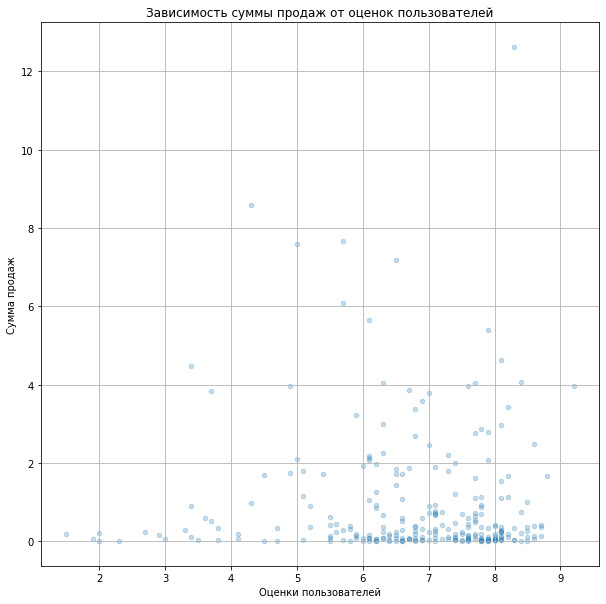

In [31]:
#Выведем график диаграммы рассеяния для оценок пользователей платформы PS4
display(data_sales_PS4.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, alpha=0.25, figsize=(10,10)))
plt.title('Зависимость суммы продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
#Вычислим и выведем корреляцию между оценками пользователей и общей суммой продаж
data_sales_PS4_corr_users = data_sales_PS4['user_score'].corr(data_sales_PS4['sum_sales'])
print('Корреляция:', data_sales_PS4_corr_users)

**Вывод:** Мы можем наблюдать невысокую отрицательную корреляцию между оценками пользователей и продажами игр. Таким образом можно сказать, что между оценками пользователей и продаваемостью игр нет прямой зависимости.

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

Корреляция: 0.40656790206178095


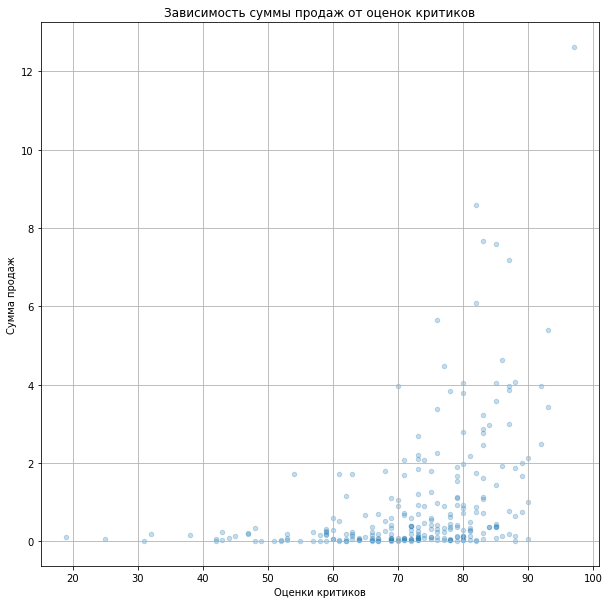

In [32]:
#Выведем график диаграммы рассеяния для оценок критиков платформы PS4
display(data_sales_PS4.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, alpha=0.25, figsize=(10,10)))
plt.title('Зависимость суммы продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')
#Вычислим и выведем корреляцию между оценками критиков и общей суммой продаж
data_sales_PS4_corr_critic = data_sales_PS4['critic_score'].corr(data_sales_PS4['sum_sales'])
print('Корреляция:', data_sales_PS4_corr_critic)

**Вывод:** Мы можем наблюдать среднюю положительную корреляцию между оценками критиков и продажами игр. Таким образом можно сказать, что чем выше оценка критиков, тем выше продаваемость игр.

**Соотнесем выводы с продажами игр на других платформах.**

In [33]:
data_sales_2012_2016.groupby('platform')['sum_sales'].median().sort_values(ascending=False)

platform
x360    0.31
wiiu    0.22
xone    0.22
ps4     0.20
ps3     0.20
wii     0.18
3ds     0.11
pc      0.08
ds      0.05
psv     0.05
psp     0.03
Name: sum_sales, dtype: float64

**Рассмотрим зависимости на других перспективных платформах, входящих в топ 5 по миру.**

**Рассмотрим платформу X360**

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

Корреляция: 0.006163978646213326


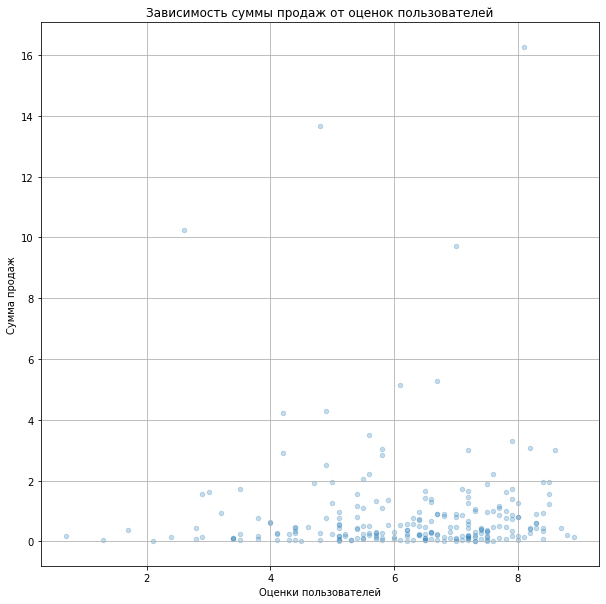

In [34]:
#Выведем график диаграммы рассеяния для оценок пользователей платформы X360
display(data_sales_X360.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, alpha=0.25, figsize=(10,10)))
plt.title('Зависимость суммы продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
#Вычислим и выведем корреляцию между оценками пользователей и общей суммой продаж
data_sales_X360_corr_users = data_sales_X360['user_score'].corr(data_sales_X360['sum_sales'])
print('Корреляция:', data_sales_X360_corr_users)

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

Корреляция: 0.3605734888507336


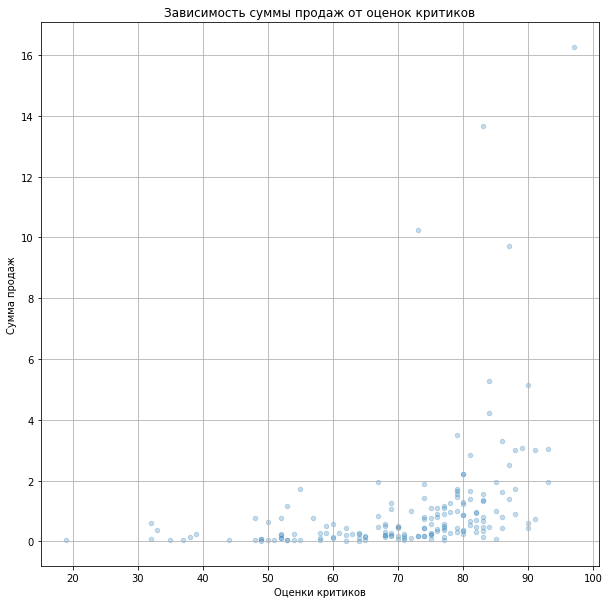

In [35]:
#Выведем график диаграммы рассеяния для оценок критиков платформы X360
display(data_sales_X360.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, alpha=0.25, figsize=(10,10)))
plt.title('Зависимость суммы продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')
#Вычислим и выведем корреляцию между оценками критиков и общей суммой продаж
data_sales_X360_corr_critic = data_sales_X360['critic_score'].corr(data_sales_X360['sum_sales'])
print('Корреляция:', data_sales_X360_corr_critic)

**Рассмотрим платформу WiiU**

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

Корреляция: 0.4002190202148617


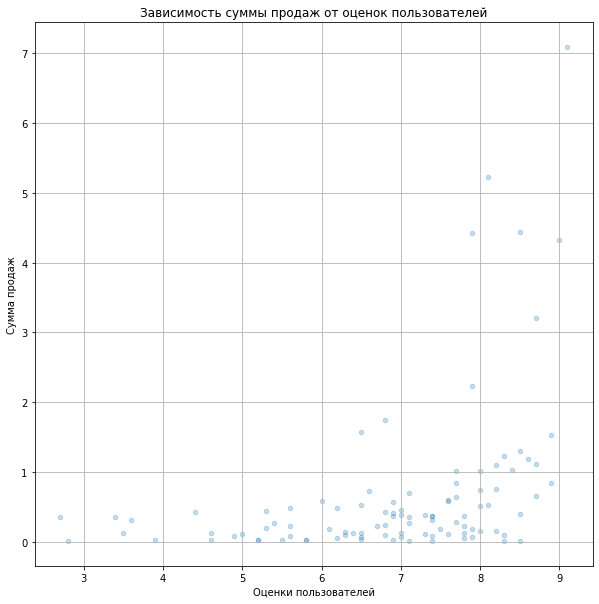

In [36]:
#Выведем график диаграммы рассеяния для оценок пользователей платформы WiiU
data_sales_WiiU = data_sales_2012_2016[data_sales_2012_2016['platform']=='wiiu']
display(data_sales_WiiU.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, alpha=0.25, figsize=(10,10)))
plt.title('Зависимость суммы продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
#Вычислим и выведем корреляцию между оценками пользователей и общей суммой продаж
data_sales_WiiU_corr_users = data_sales_WiiU['user_score'].corr(data_sales_WiiU['sum_sales'])
print('Корреляция:', data_sales_WiiU_corr_users)

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

Корреляция: 0.34837976012017485


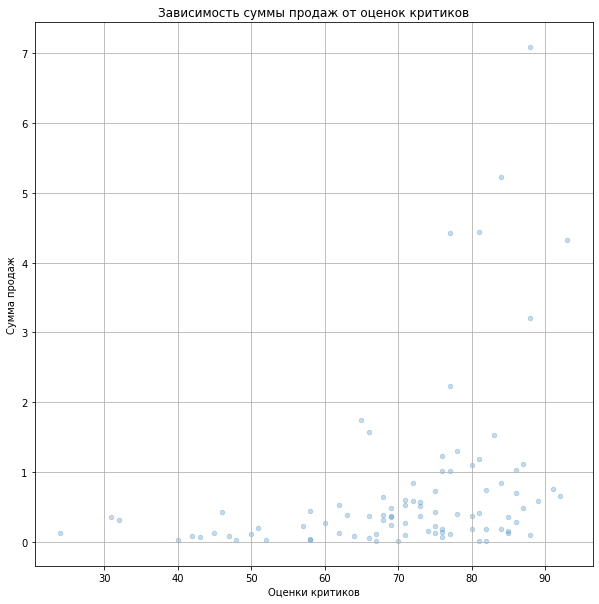

In [37]:
#Выведем график диаграммы рассеяния для оценок критиков платформы WiiU
display(data_sales_WiiU.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, alpha=0.25, figsize=(10,10)))
plt.title('Зависимость суммы продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')
#Вычислим и выведем корреляцию между оценками критиков и общей суммой продаж
data_sales_WiiU_corr_critic = data_sales_WiiU['critic_score'].corr(data_sales_WiiU['sum_sales'])
print('Корреляция:', data_sales_WiiU_corr_critic)

**Рассмотрим платформу XOne**

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

Корреляция: -0.06892505328279414


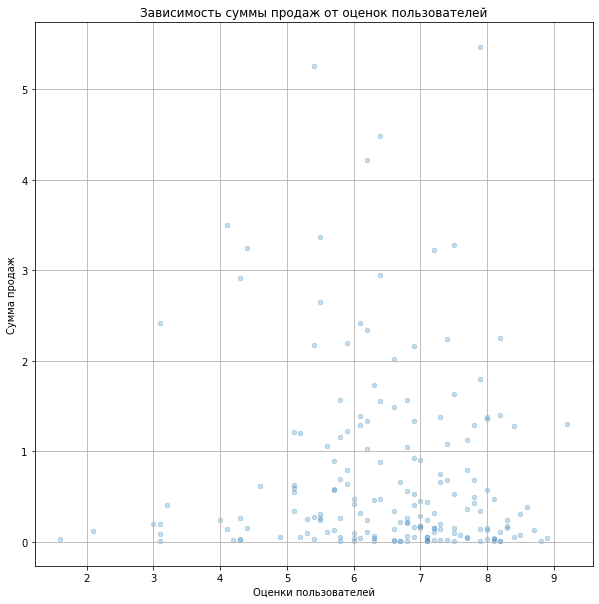

In [38]:
#Выведем график диаграммы рассеяния для оценок пользователей платформы XOne
display(data_sales_XOne.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, alpha=0.25, figsize=(10,10)))
plt.title('Зависимость суммы продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
#Вычислим и выведем корреляцию между оценками пользователей и общей суммой продаж
data_sales_XOne_corr_users = data_sales_XOne['user_score'].corr(data_sales_XOne['sum_sales'])
print('Корреляция:', data_sales_XOne_corr_users)

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

Корреляция: 0.4169983280084017


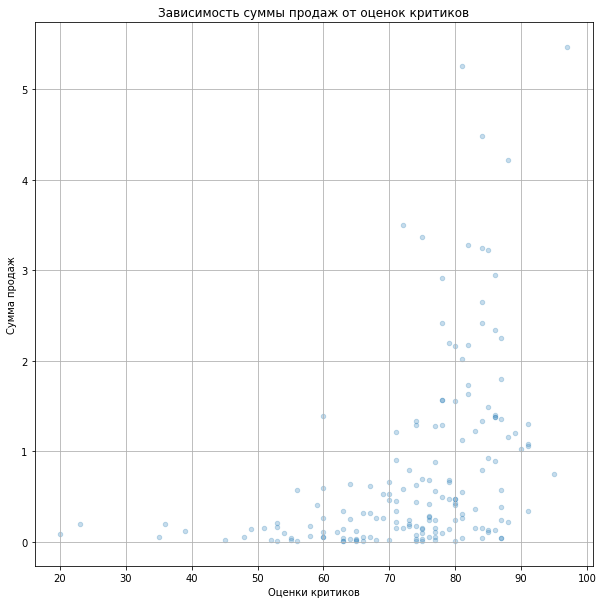

In [39]:
#Выведем график диаграммы рассеяния для оценок критиков платформы XOne
display(data_sales_XOne.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, alpha=0.25, figsize=(10,10)))
plt.title('Зависимость суммы продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')
#Вычислим и выведем корреляцию между оценками критиков и общей суммой продаж
data_sales_XOne_corr_critic = data_sales_XOne['critic_score'].corr(data_sales_XOne['sum_sales'])
print('Корреляция:', data_sales_XOne_corr_critic)

**Рассмотрим платформу PS3**

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

Корреляция: -0.006205767686051523


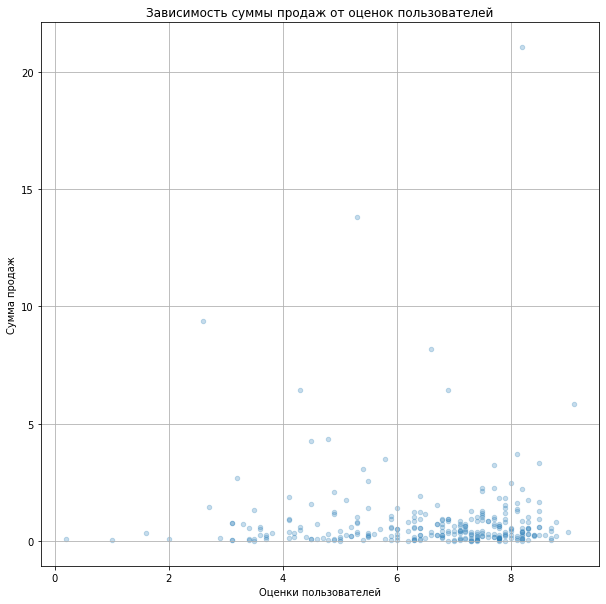

In [40]:
#Выведем график диаграммы рассеяния для оценок пользователей платформы PS3
display(data_sales_PS3.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, alpha=0.25, figsize=(10,10)))
plt.title('Зависимость суммы продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
#Вычислим и выведем корреляцию между оценками пользователей и общей суммой продаж
data_sales_PS3_corr_users = data_sales_PS3['user_score'].corr(data_sales_PS3['sum_sales'])
print('Корреляция:', data_sales_PS3_corr_users)

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

Корреляция: 0.3341517575509856


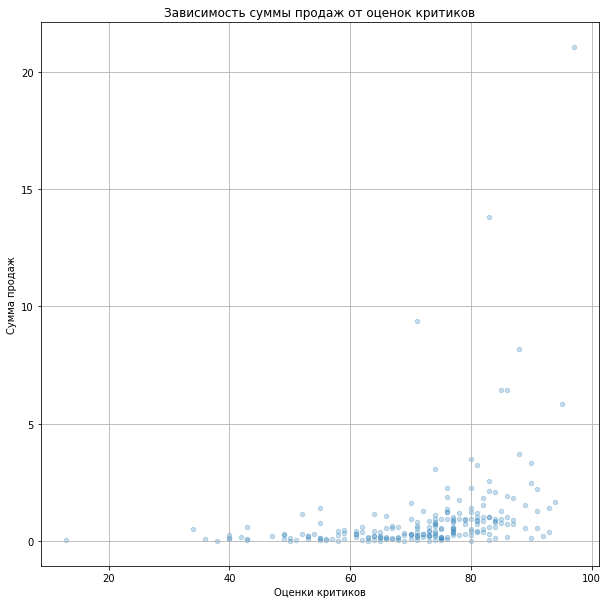

In [41]:
#Выведем график диаграммы рассеяния для оценок критиков платформы PS3
display(data_sales_PS3.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, alpha=0.25, figsize=(10,10)))
plt.title('Зависимость суммы продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')
#Вычислим и выведем корреляцию между оценками критиков и общей суммой продаж
data_sales_PS3_corr_critic = data_sales_PS3['critic_score'].corr(data_sales_PS3['sum_sales'])
print('Корреляция:', data_sales_PS3_corr_critic)

**Вывод:** На всех исследованных нами платформах существует положительная корреляция между оценкой критиков и продажами игр. Это значит, что чем выше оценка критиков, тем выше продажи. Среди оценок пользователей только на платформе WiiU существует значимая положительная корреляция между оценкой пользователей и продажами. Скорее всего это связано с тем, что она создана в Японии, где пользователи сильнее влияют на продаваемость игр. PS4 занимает значение в топе рейтинга медианных продаж по всем платформам.

**Посмотрим на общее распределение игр по жанрам.**

In [42]:
#Выведем существующие жанры списком
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Text(0, 0.5, 'Продажи в млн.')

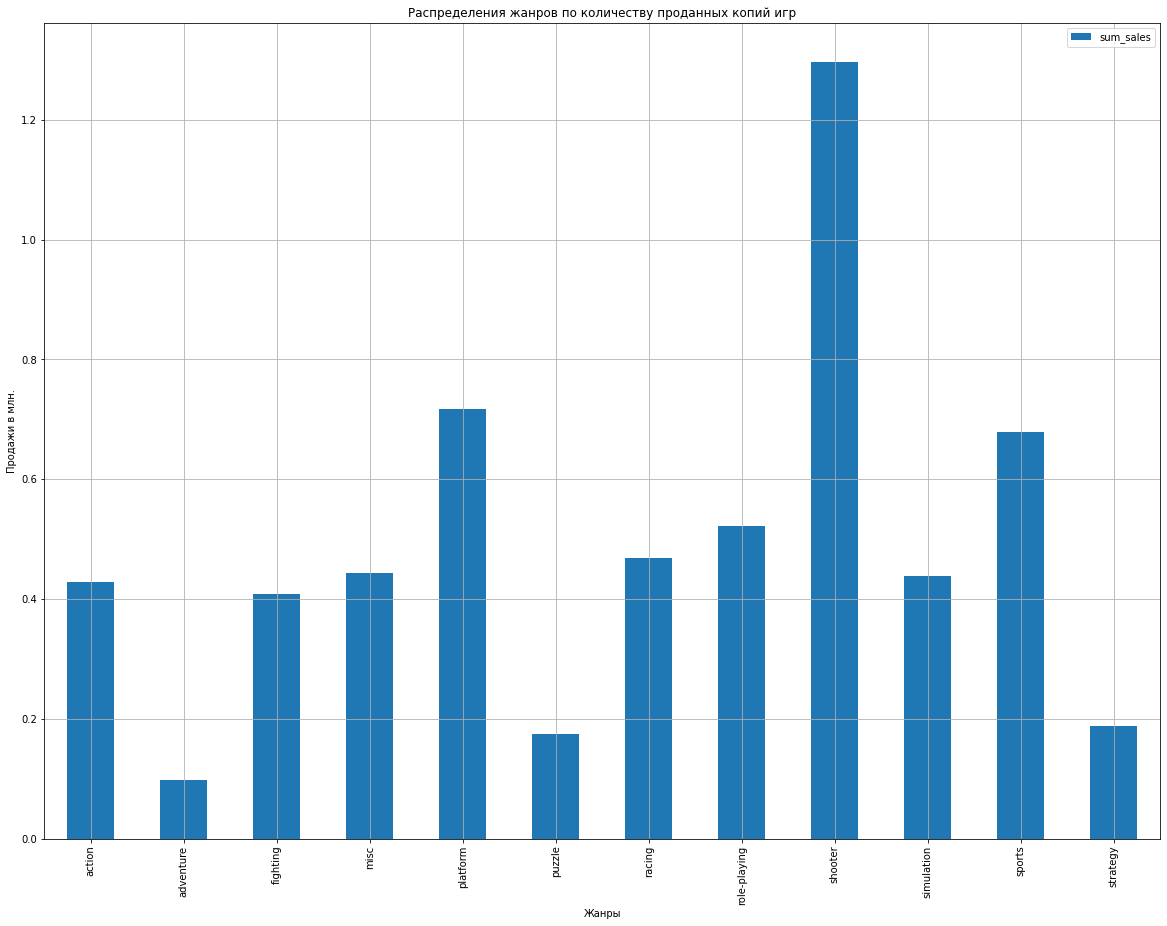

In [43]:
#Выведем график для распределения жанров по количеству проданных копий игр
data_sales_2012_2016.pivot_table(index='genre', values='sum_sales').plot(y='sum_sales', kind='bar', figsize=(20, 15), grid=True)
plt.title('Распределения жанров по количеству проданных копий игр')
plt.xlabel('Жанры')
plt.ylabel('Продажи в млн.')

Text(0, 0.5, 'Продажи в млн.')

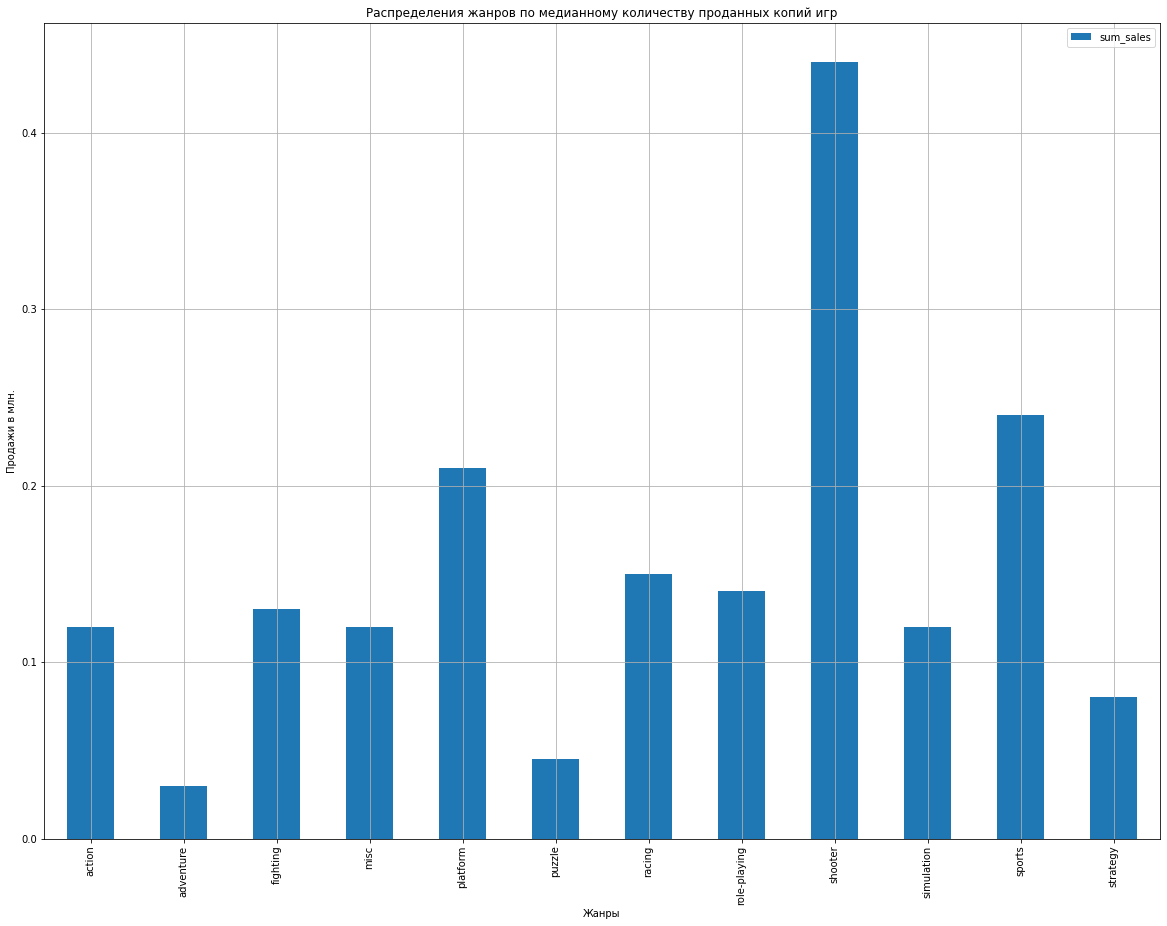

In [44]:
#Выведем график для распределения жанров по медианному количеству проданных копий игр
data_sales_2012_2016.pivot_table(index='genre', values='sum_sales', aggfunc='median').plot(y='sum_sales', kind='bar', figsize=(20, 15), grid=True)
plt.title('Распределения жанров по медианному количеству проданных копий игр')
plt.xlabel('Жанры')
plt.ylabel('Продажи в млн.')

**Вывод:** Наиболее популярные жанры за актуальный период это:
 - 1. Shooter.
 - 2. Platform, Sports.
 - 3. Role-Playing.
 - 4. Racing, Fighting.
 
 Все это довольно разные жанры и на них нельзя проследить тенденцию и предсказать, какой жанр будет прибыльным в дальнейшем.
 
 Среди наименее популярных жанров можно выделить:
 - 1. Adventure.
 - 2. Puzzle.
 - 3. Strategy.
 
 Это жанры, игр по которым выпускается мало. Не удивительно, что у них низкие продажи.
 
 Наиболее выделяющиеся по продажам жанры, это жанры по которым много турниров или спидранов и богатое комьюнити.

**4 Шаг 4. Составим портрет пользователя каждого региона.**

**Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5).**

In [45]:
#Выведем для актуального периода времени все продажи в регионе NA (Северная Америка) отличные от нуля
data_sales_2012_2016_na = data_sales_2012_2016[data_sales_2012_2016['na_sales'] > 0]
data_sales_2012_2016_na

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16615,balloon pop 2,3ds,2012,puzzle,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16618,xblaze: lost memories,psv,2015,adventure,0.01,0.00,0.00,0.00,NaN,7.0,M,0.01
16660,prison architect,xone,2016,action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
16672,metal gear solid v: the definitive experience,xone,2016,action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


In [46]:
#Выведем для актуального периода времени все продажи в регионе EU (Европа) отличные от нуля
data_sales_2012_2016_eu = data_sales_2012_2016[data_sales_2012_2016['eu_sales'] > 0]
data_sales_2012_2016_eu

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,zombiu,xone,2016,action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16652,fast racing neo,wiiu,2016,action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16654,ben 10 omniverse 2,x360,2013,action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
16674,tsukigime ranko's longest day,ps3,2014,action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


In [47]:
#Выведем для актуального периода времени все продажи в регионе JP (Япония) отличные от нуля
data_sales_2012_2016_jp = data_sales_2012_2016[data_sales_2012_2016['jp_sales'] > 0]
data_sales_2012_2016_jp

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


platform
x360    140.05
ps4     108.74
ps3     103.38
xone     93.12
3ds      55.31
wiiu     38.10
pc       19.12
wii      17.45
psv      10.98
ds        4.59
psp       0.13
Name: na_sales, dtype: float64

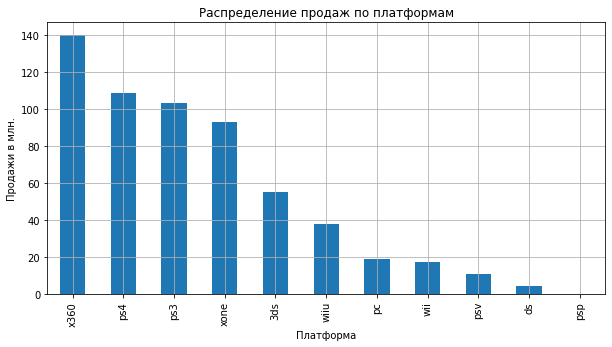

In [66]:
#Создадим сводную таблицу для распределения по различным платформам в конкретном регионе
data_sales_2012_2016_na_group = data_sales_2012_2016_na.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False)
data_sales_2012_2016_na_group.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи в млн.')
data_sales_2012_2016_na_group

**Вывод:** Самой популярной платформой в регионе NA является X360. Самой непопулярной - PSP. Скорее всего это связано с тем, что X360 выпускается американской компанией. 

    Топ 5 платформ для этого региона:
- 1.X360
- 2.PS4
- 3.PS3
- 4.XOne
- 5.3DS

X360 почти на 32 млн. опережает ближайшую к нему в рейтинге PS4. Разница в продажах между PS4, PS3 и XOne около 5-10% соответственно. Замыкает список 3DS с почти двукратным отставанием от XOne.

platform
ps4     141.09
ps3     106.85
x360     74.52
xone     51.59
3ds      42.64
pc       37.70
wiiu     25.13
wii      11.92
psv      11.36
ds        3.53
psp       0.42
Name: eu_sales, dtype: float64

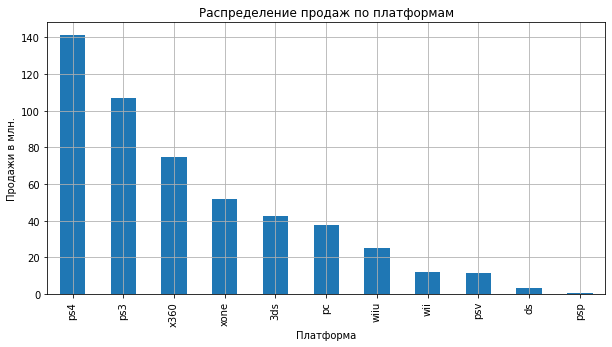

In [60]:
#Создадим сводную таблицу для распределения по различным платформам в конкретном регионе
data_sales_2012_2016_eu_group = data_sales_2012_2016_eu.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False)
data_sales_2012_2016_eu_group.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи в млн.')
data_sales_2012_2016_eu_group

**Вывод:**  Самой популярной платформой в регионе EU является PS4. Самой непопулярной - PSP.

    Топ 5 платформ для этого региона:
- 1.PS4
- 2.PS3
- 3.X360
- 4.XOne
- 5.3DS

PS4 почти на 35 млн. опережает ближайшую к нему в рейтинге PS3. PS3 опережает X360 на около 30%. Замыкает список 3DS на этот раз с небольшим отставанием от XOne.

platform
3ds     87.79
ps3     35.29
psv     21.04
ps4     15.96
wiiu    13.01
psp     10.47
ds       3.72
wii      3.39
x360     1.57
xone     0.34
Name: jp_sales, dtype: float64

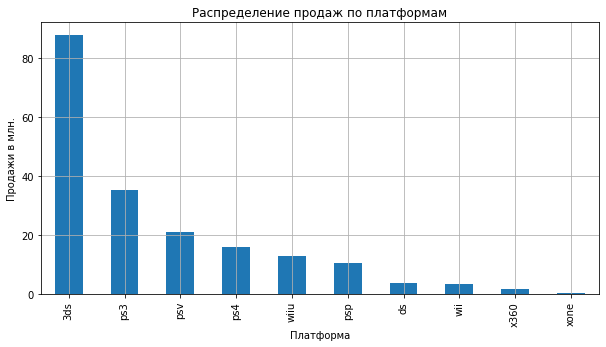

In [61]:
#Создадим сводную таблицу для распределения по различным платформам в конкретном регионе
data_sales_2012_2016_jp_group = data_sales_2012_2016_jp.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False)
data_sales_2012_2016_jp_group.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи в млн.')
data_sales_2012_2016_jp_group

**Вывод:** Самой популярной платформой в регионе JP является 3DS. Самой непопулярной - XOne. Скорее всего это связано с тем, что 3DS выпускается японской компанией. 

    Топ 5 платформ для этого региона:
- 1.3DS
- 2.PS3
- 3.PSV
- 4.PS4
- 5.WiiU

Все платформы топа являются японскими. 3DS более чем в 2 раза опережает ближайшего конкурента PS3. Замыкает топ WiiU с 13 млн. продаж игр.

**Определим для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5).**

genre
action          177.84
shooter         144.77
sports           81.53
role-playing     64.00
misc             38.19
platform         25.38
fighting         19.79
racing           17.22
adventure         8.92
simulation        7.97
strategy          4.23
puzzle            1.13
Name: na_sales, dtype: float64

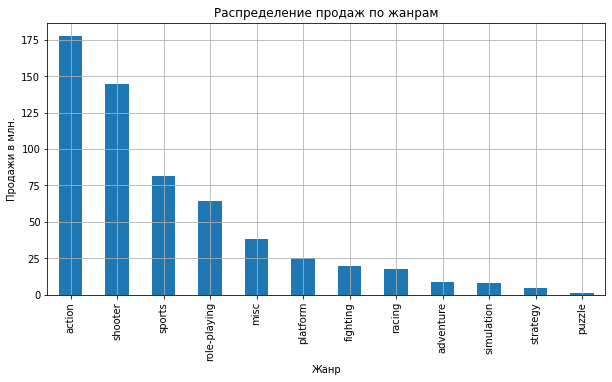

In [63]:
#Создадим сводную таблицу для распределения по популярным жанрам в конкретном регионе
data_sales_2012_2016_na_genre_group = data_sales_2012_2016_na.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False)
data_sales_2012_2016_na_genre_group.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн.')
data_sales_2012_2016_na_genre_group

**Вывод:** Топ 5 самых популярных жанров для этого региона:
- 1.Action
- 2.Shooter
- 3.Sports
- 4.Role-Playing
- 5.Misc

genre
action          159.34
shooter         113.47
sports           69.08
role-playing     48.53
racing           27.23
misc             26.32
platform         21.41
simulation       14.55
fighting         10.79
adventure         9.46
strategy          5.17
puzzle            1.40
Name: eu_sales, dtype: float64

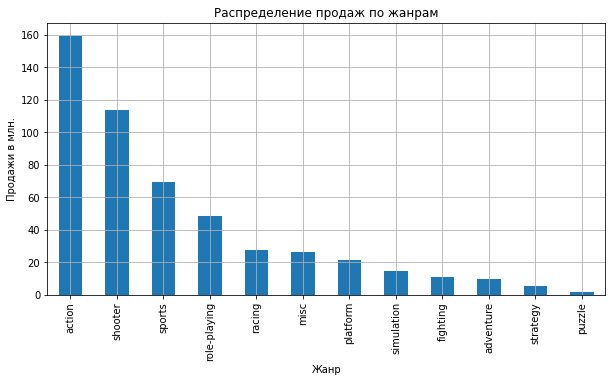

In [64]:
#Создадим сводную таблицу для распределения по популярным жанрам в конкретном регионе
data_sales_2012_2016_eu_genre_group = data_sales_2012_2016_eu.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False)
data_sales_2012_2016_eu_genre_group.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн.')
data_sales_2012_2016_eu_genre_group

**Вывод:** Топ 5 самых популярных жанров для этого региона:
- 1.Action
- 2.Shooter
- 3.Sports
- 4.Role-Playing
- 5.Racing

В целом вкусы американских и европейских геймеров схожи так как они культурно близки и многие американские игры делаются на аутсорсе в Европе.

genre
role-playing    65.44
action          52.80
misc            12.86
simulation      10.41
fighting         9.44
shooter          9.23
platform         8.63
adventure        8.24
sports           8.01
strategy         2.88
racing           2.50
puzzle           2.14
Name: jp_sales, dtype: float64

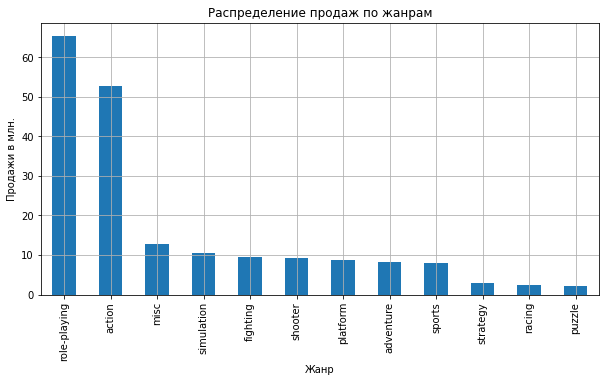

In [65]:
#Создадим сводную таблицу для распределения по популярным жанрам в конкретном регионе
data_sales_2012_2016_jp_genre_group = data_sales_2012_2016_jp.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False)
data_sales_2012_2016_jp_genre_group.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн.')
data_sales_2012_2016_jp_genre_group

**Вывод:** Топ 5 самых популярных жанров для этого региона:
- 1.Role-Playing
- 2.Action
- 3.Misc
- 4.Simulation
- 5.Fighting

В топ по японии добавились игры жанра Fighting. Это произошло потому, что многие игры этого жанра сделаны в Японии.

**Определим для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

rating
M       231.57
E       114.37
E10+     75.70
T        66.02
Name: na_sales, dtype: float64

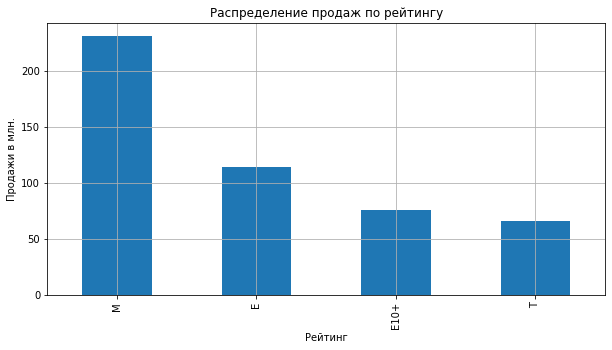

In [54]:
#Создадим сводную таблицу для распределения по рейтингу в конкретном регионе
data_sales_2012_2016_na_rating_group = data_sales_2012_2016_na.groupby('rating')['na_sales'].agg('sum').sort_values(ascending=False)
data_sales_2012_2016_na_rating_group.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Распределение продаж по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в млн.')
data_sales_2012_2016_na_rating_group

rating
M       193.96
E       113.02
E10+     55.37
T        52.90
Name: eu_sales, dtype: float64

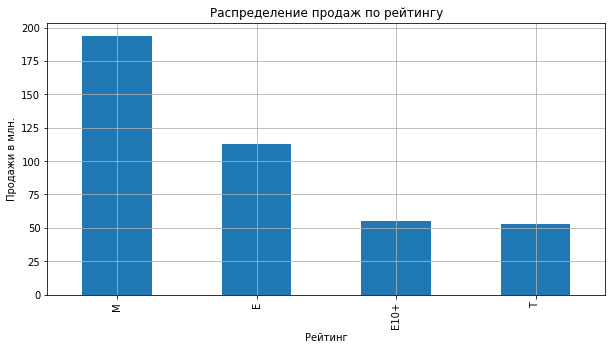

In [55]:
#Создадим сводную таблицу для распределения по рейтингу в конкретном регионе
data_sales_2012_2016_eu_genre_group = data_sales_2012_2016_eu.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending=False)
data_sales_2012_2016_eu_genre_group.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Распределение продаж по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в млн.')
data_sales_2012_2016_eu_genre_group

rating
E       28.33
T       26.02
M       21.20
E10+     8.19
Name: jp_sales, dtype: float64

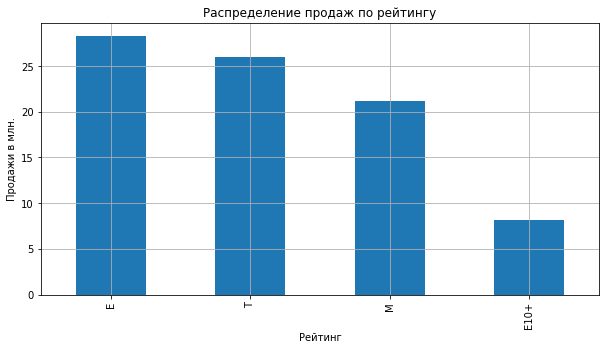

In [56]:
#Создадим сводную таблицу для распределения по рейтингу в конкретном регионе
data_sales_2012_2016_jp_genre_group = data_sales_2012_2016_jp.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending=False)
data_sales_2012_2016_jp_genre_group.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Распределение продаж по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в млн.')
data_sales_2012_2016_jp_genre_group

**Вывод:** В регионах NA и EU игры ориентированны на более взрослых пользователей (рейтинг M - 17+). В Японии игры ориентированны на детей и подростков. Поэтому при разработке игр ориентированных на конкретный регион стоит отталкиваться от рейтинга.

**5 Шаг 5. Проверим гипотезы**

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза: H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: H_1: Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [57]:
#Подготовим данные
data_rating_XOne = data_sales_2012_2016[data_sales_2012_2016['platform'] == 'xone']
data_rating_XOne = data_rating_XOne['user_score'].dropna()
data_rating_PC= data_sales_2012_2016[data_sales_2012_2016['platform'] == 'pc']
data_rating_PC = data_rating_PC['user_score'].dropna()
alpha = 0.05

#Проведем T-test
results = st.ttest_ind(data_rating_XOne, data_rating_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 0.5112133814834332
Не отвергаем нулевую гипотезу


**Вывод:**  Не отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза: H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: H_1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [58]:
#Подготовим данные
data_genre_Action = data_sales_2012_2016[data_sales_2012_2016['genre'] == 'action']
data_genre_Action = data_genre_Action['user_score'].dropna()
data_genre_Sports= data_sales_2012_2016[data_sales_2012_2016['genre'] == 'sports']
data_genre_Sports = data_genre_Sports['user_score'].dropna()
alpha = 0.05

#Проведем T-test
results = st.ttest_ind(data_genre_Action, data_genre_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


**Вывод:** Принимаем альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

**Поясним:
Как сформулировали нулевую и альтернативную гипотезы.**

Нулевую гипотезу сформулировали на основе равенства двух исследуемых значений (например - равенства рейтингов жанров Action и Sports). Альтернативную гипотезу соответственно сформулировали на основе неравенства (параметр alternative в ttest_ind оставили по умолчанию, как двусторонний).

**Поясним:
Какой критерий применили для проверки гипотез и почему.**

Применили критерий ttest_ind потому, что он сравнивает две разные выборки с разным числом элементов между собой.

**6 Шаг 6. ОБЩИЙ ВЫВОД.**

**Выводы по работе: Исследовательский анализ данных.**

- Данные с 1980 по 1993 годы можно не учитывать, так как за каждый год выходило немного игр.
- Новые платформы появляются и исчезают за период примерно в 10 лет.
- Судя по данным за актуальный период (2012-2016 года) наблюдается спад продаж с разных платформ. Скорее всего в 2017 году продажи будут ниже чем в 2016.
- Судя по графикам лидирующие платформы, это PS4 и XOne. Со старта продаж по 2015 год на этих платформах наблюдался рост продаж игр. Но с 2015 по 2016 уровень продаж игр падает.
- За весь период с момента старта продаж X360 показал максимальную медианную выручку среди рассматриваемых платформ, составившую 0.28 млн. Максимальная выручка составила 21.82 млн.
- Мы можем наблюдать невысокую отрицательную корреляцию между оценками пользователей и продажами игр. Таким образом можно сказать, что между оценками пользователей и продаваемостью игр нет прямой зависимости.
- Мы можем наблюдать среднюю положительную корреляцию между оценками критиков и продажами игр. Таким образом можно сказать, что чем выше оценка критиков, тем выше продаваемость игр.
- На всех исследованных нами платформах существует положительная корреляция между оценкой критиков и продажами игр. Это значит, что чем выше оценка критиков, тем выше продажи. Среди оценок пользователей только на платформе WiiU существует значимая положительная корреляция между оценкой пользователей и продажами. Скорее всего это связано с тем, что она создана в Японии, где пользователи сильнее влияют на продаваемость игр. PS4 занимает значение в середине рейтинга медианных продаж по всем платформам. Таким образом PS4 остается в топе по продажам игр.
- Наиболее популярные жанры за актуальный период это:  
 - 1. Shooter.
 - 2. Platform, Sports.
 - 3. Role-Playing.
 - 4. Racing, Fighting.
- Среди наименее популярных жанров можно выделить: Adventure, Puzzle, Strategy.

**Выводы по работе: Портрет пользователей каждого региона.**

- Самой популярной платформой в регионе NA является X360. Самой непопулярной - PSP. Скорее всего это связано с тем, что X360 выпускается американской компанией. Топ 5 платформ для этого региона:
    1.X360
    2.PS4
    3.PS3
    4.XOne
    5.3DS
- Самой популярной платформой в регионе EU является PS4. Самой непопулярной - PSP. Топ 5 платформ для этого региона:
    1.PS4
    2.PS3
    3.X360
    4.XOne
    5.3DS
- Самой популярной платформой в регионе JP является 3DS. Самой непопулярной - XOne. Скорее всего это связано с тем, что 3DS выпускается японской компанией. Топ 5 платформ для этого региона:
    1.3DS
    2.PS3
    3.PSV
    4.PS4
    5.WiiU
- Топ 5 самых популярных жанров для региона NA:
    1.Action
    2.Shooter
    3.Sports
    4.Role-Playing
    5.Misc
- Топ 5 самых популярных жанров для региона EU:
    1.Action
    2.Shooter
    3.Sports
    4.Role-Playing
    5.Racing
- В целом вкусы американских и европейских геймеров схожи так как они культурно близки и многие американские игры делаются на аутсорсе в Европе.
- Топ 5 самых популярных жанров для региона JP:
    1.Role-Playing
    2.Action
    3.Misc
    4.Simulation
    5.Fighting
- В топ по японии добавились игры жанра Fighting. Это произошло потому, что многие игры этого жанра сделаны в Японии.
- В регионах NA и EU игры ориентированны на более взрослых пользователей (рейтинг M - 17+). В Японии игры ориентированны на детей и подростков. Поэтому при разработке игр ориентированных на конкретный регион стоит отталкиваться от рейтинга.

**Выводы по работе: Проверка гипотез.**

- Не отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Принимаем альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.